In [1]:
pip install umap-learn
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
df = pd.read_csv('/Users/simayozkan/Downloads/3.csv').iloc[:,1:] 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df.head()

,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,20200000000000.000,2021.01.01,16:36:21,35.927,27.866,26.100,3.900,0.000,3.900,3.700,0.000,0.000,Ke,RODOS ADASI (AKDENIZ)
1,20200000000000.000,2020.12.31,0:51:28,37.843,26.777,8.000,3.800,0.000,3.800,3.700,0.000,0.000,Ke,EGE DENIZI
2,20200000000000.000,2020.12.30,18:45:13,36.492,28.709,5.000,3.900,0.000,3.700,3.900,0.000,0.000,Ke,AKDENIZ
3,20200000000000.000,2020.12.30,13:40:12,37.796,26.416,14.400,4.400,0.000,4.400,4.300,0.000,0.000,Ke,ONIKI ADALAR (AKDENIZ)
4,20200000000000.000,2020.12.27,20:08:37,38.417,39.148,5.000,3.900,0.000,3.700,3.900,0.000,0.000,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
 

check_df(df)

##################### Shape #####################
(17370, 14)
##################### Types #####################
Deprem Kodu    float64
Olus tarihi     object
Olus zamani     object
Enlem          float64
Boylam         float64
Derinlik       float64
xM             float64
MD             float64
ML             float64
Mw             float64
Ms             float64
Mb             float64
Tip             object
Yer             object
dtype: object
##################### Head #####################
         Deprem Kodu Olus tarihi Olus zamani  Enlem  Boylam  Derinlik    xM    MD    ML    Mw    Ms    Mb Tip                                             Yer
0 20200000000000.000  2021.01.01    16:36:21 35.927  27.866    26.100 3.900 0.000 3.900 3.700 0.000 0.000  Ke                           RODOS ADASI (AKDENIZ)
1 20200000000000.000  2020.12.31     0:51:28 37.843  26.777     8.000 3.800 0.000 3.800 3.700 0.000 0.000  Ke                                      EGE DENIZI
2 20200000000000.000  2020.12

In [34]:
df_ = df.iloc[:, [5]]  
df_.head()

,Derinlik
0,26.100
1,8.000
2,5.000
3,14.400
4,5.000


/Users/simayozkan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simayozkan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simayozkan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/simayozkan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

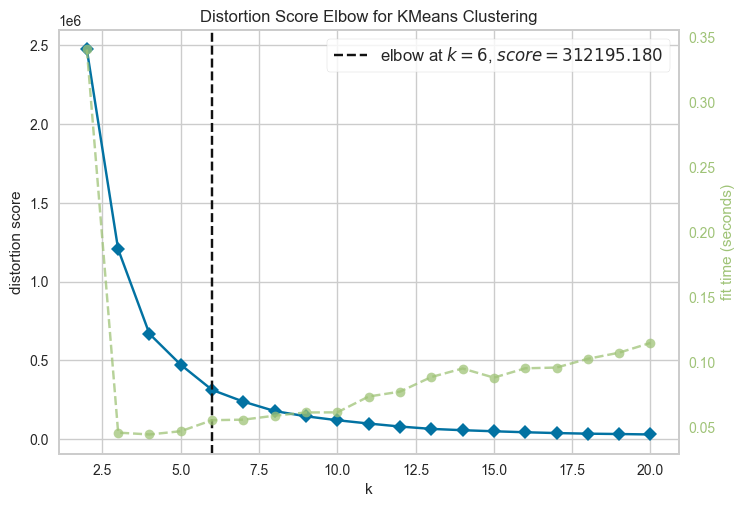

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 21))
elbow.fit(df_)
elbow.show()

In [ ]:
cluster_number = 6
knn = KMeans(cluster_number)
knn.fit(df_)
classes = knn.fit_transform(df_)

In [29]:
classes = pd.Series(knn.labels_)
classes.name = "classes"

In [30]:
data = pd.concat([df, classes], axis = 1)
data.head()

,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,classes
0,20200000000000.000,2021.01.01,16:36:21,35.927,27.866,26.100,3.900,0.000,3.900,3.700,0.000,0.000,Ke,RODOS ADASI (AKDENIZ),3
1,20200000000000.000,2020.12.31,0:51:28,37.843,26.777,8.000,3.800,0.000,3.800,3.700,0.000,0.000,Ke,EGE DENIZI,0
2,20200000000000.000,2020.12.30,18:45:13,36.492,28.709,5.000,3.900,0.000,3.700,3.900,0.000,0.000,Ke,AKDENIZ,0
3,20200000000000.000,2020.12.30,13:40:12,37.796,26.416,14.400,4.400,0.000,4.400,4.300,0.000,0.000,Ke,ONIKI ADALAR (AKDENIZ),5
4,20200000000000.000,2020.12.27,20:08:37,38.417,39.148,5.000,3.900,0.000,3.700,3.900,0.000,0.000,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],0


In [31]:
data["classes"].value_counts()

classes
0    8017
5    6105
3    1914
1     749
4     415
2     170
Name: count, dtype: int64

In [ ]:
umap_model = umap.UMAP(n_components = 2, n_neighbors = 40, min_dist = 1.0)
df_umap = umap_model.fit_transform(df_)

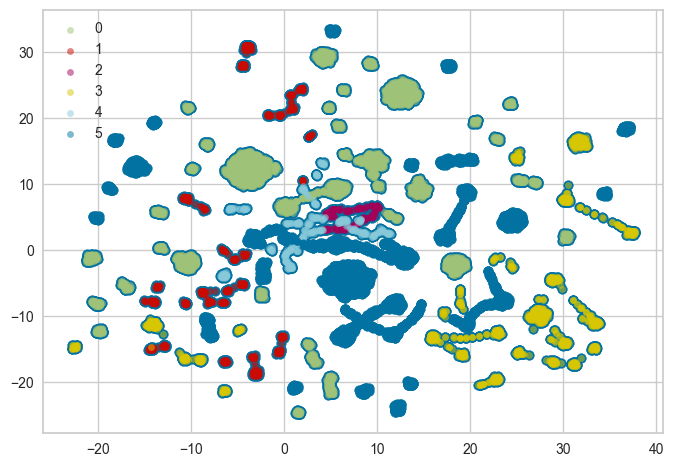

In [33]:
plt.scatter(df_umap[:,0],  df_umap[:,1])

for i in range(cluster_number):
    plt.scatter(df_umap[classes == i,0], df_umap[classes == i,1], zorder = 1, alpha = 0.5, s = 20, label = f"{i}")
plt.legend()
plt.show()